In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
train2 = pd.read_csv("data/train2.csv")
test2 = pd.read_csv("data/test2.csv")
val2 = pd.read_csv("data/val2.csv")

In [3]:
print(train2.shape, test2.shape, val2.shape)

(10239, 14) (1266, 14) (1283, 14)


In [4]:
train2["source"] = "train"
test2["source"] = "test"
val2["source"] = "val"
data = pd.concat([train2, test2, val2], ignore_index=True)
print(data.shape)

(12788, 15)


In [5]:
data.isna().sum()

statement                  0
subject                    2
speaker                    2
job                     3567
state                   2749
party                      2
barely_true_counts         2
false_counts               2
half_true_counts           2
mostly_true_counts         2
pants_on_fire_counts       2
context                  131
justification             97
label                      0
source                     0
dtype: int64

In [6]:
len(data["statement"])-len(data.drop_duplicates(subset="statement"))

26

In [7]:
len(data["justification"])-len(data.drop_duplicates(subset="justification"))

114

In [8]:
data[data.duplicated(subset="statement", keep="first")]

,statement,subject,speaker,job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,justification,label,source
1013,On abortion,"abortion,candidates-biography",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,various statements,What is more telling is his stances on particu...,half-true,train
1813,On support for gay marriage.,"civil-rights,families,gays-and-lesbians,marriage",barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a TV interview,"Obama said the Justice Department has ""taken o...",false,train
1845,"Obama says Iran is a 'tiny' country, 'doesn't ...",foreign-policy,john-mccain,U.S. senator,Arizona,republican,31.0,39.0,31.0,37.0,8.0,a TV ad,"Crisafulli said, ""If we choose Obamacare expan...",false,train
2696,On repealing the 17th Amendment,"debates,elections,states",david-dewhurst,Lieutenant governor,Texas,republican,8.0,8.0,10.0,5.0,5.0,a debate,Spokespersons for Scott referred us to Scotts ...,false,train
2845,"Four balanced budgets in a row, with no new ta...","job-accomplishments,jobs,state-budget,state-fi...",chris-christie,Governor of New Jersey,New Jersey,republican,10.0,17.0,27.0,19.0,8.0,a television ad,The bottom-10 schools included seven choice sc...,mostly-true,train
3255,On a cap-and-trade plan.,"cap-and-trade,climate-change,environment",tim-pawlenty,NaN,NaN,republican,2.0,3.0,3.0,6.0,1.0,a letter to the Minnesota delegation in Washin...,"Texas Right to Life said, ""Wendy Davis opposes...",false,train
4385,On the Trans-Pacific Partnership.,trade,pat-toomey,Candidate for U.S. Senate,Pennsylvania,republican,3.0,2.0,2.0,1.0,0.0,an op-ed in the Pittsburgh Post-Gazette.,We need not take up the last part of his sente...,false,train
4838,During Sherrod Browns past decade as a D.C. po...,"economy,job-accomplishments,jobs",josh-mandel,Ohio treasurer,Ohio,republican,4.0,5.0,4.0,5.0,6.0,a news release,The congressman said domestic greenhouse gas e...,half-true,train
4939,On changing the rules for filibusters on presi...,congressional-rules,mitch-mcconnell,Senate minority leader,Kentucky,republican,7.0,6.0,5.0,7.0,0.0,speeches,Kaine said Allen voted to end Pell Grants for ...,false,train
6758,On torture.,"human-rights,terrorism",newt-gingrich,"Co-host on CNN's ""Crossfire""",Georgia,republican,16.0,15.0,20.0,10.0,11.0,a news interview,"Within that time frame, the unemployment rate ...",half-true,train


In [9]:
data = data.drop_duplicates(subset="statement")
data = data.drop_duplicates(subset="justification")
data["statement"] = data["statement"].str.replace('[^\w\s]',' ')
data["justification"] = data["justification"].str.replace('[^\w\s]',' ')
data["statement"] = data["statement"].str.replace('[^A-Za-z]',' ')
data["justification"] = data["justification"].str.replace('[^A-Za-z]',' ')
data["statement"] = data["statement"].str.replace(' +',' ')
data["justification"] = data["justification"].str.replace(' +',' ')
data["statement"] = data["statement"].str.lower()
data["justification"] = data["justification"].str.lower()
print(data.shape)

(12650, 15)


In [10]:
train2 = data[data["source"] == "train"]
test2 = data[data["source"] == "test"]
val2 = data[data["source"] == "val"]
train2 = train2.drop(["source"], axis=1)
test2 = test2.drop(["source"], axis=1)
val2 = val2.drop(["source"], axis=1)
print(train2.shape, test2.shape, val2.shape)

(10130, 14) (1250, 14) (1270, 14)


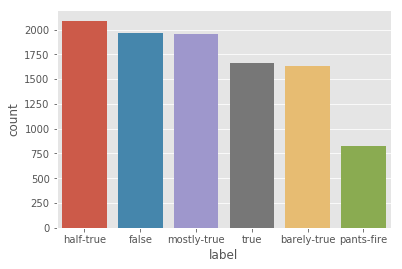

In [11]:
sns.countplot(x="label", data=train2, order=train2["label"].value_counts().index)

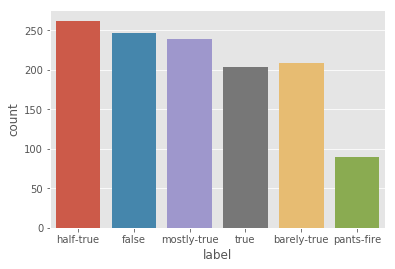

In [12]:
sns.countplot(x="label", data=test2, order=train2["label"].value_counts().index)

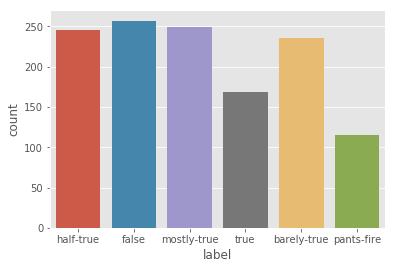

In [13]:
sns.countplot(x="label", data=val2, order=train2["label"].value_counts().index)

In [14]:
def encode_label(df):
    df.loc[df["label"] == "pants-fire", "label"] = 0
    df.loc[df["label"] == "false", "label"] = 1
    df.loc[df["label"] == "barely-true", "label"] = 2
    df.loc[df["label"] == "half-true", "label"] = 3
    df.loc[df["label"] == "mostly-true", "label"] = 4
    df.loc[df["label"] == "true", "label"] = 5
    return df

In [15]:
train2  = encode_label(train2)
test2  = encode_label(test2)
val2  = encode_label(val2)

In [16]:
train2.to_csv("data/train2_processed.csv", index=False)
test2.to_csv("data/test2_processed.csv", index=False)
val2.to_csv("data/val2_processed.csv", index=False)